## Course Announcements

- A3 due next Sunday (11:59 PM)


## COGS 108 Team Evaluations

- Final Project : 1 submission *per group*
- Evaluations : 1 *per student*
    - Survey must be filled out by each individual
    - URL: http://bit.ly/COGS108_TeamEval
    - Includes: 
        - Evaluation of group
        - Evaluation of each individual
        
This means that different members of the same group *can* receive different grades on the final project.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 18})
import seaborn as sns

import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

from scipy.stats import pearsonr, norm, ttest_ind

#improve resolution
%config InlineBackend.figure_format ='retina'

## Inference II: Building on Regression
- Association between variables: **correlation** (& causation)
- Visualizing multple linear regression
- Comparison of means: **t-test**

## Correlation: Pearson correlation ($r$)

- measures the strength of association between two variables 
- takes values [-1,1]

# Positive Correlation 
- $r$ > 0
- as $r$ approaches 1, x and y are highly correlated 

In [3]:
np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)
  
# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)

np.corrcoef(x, y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

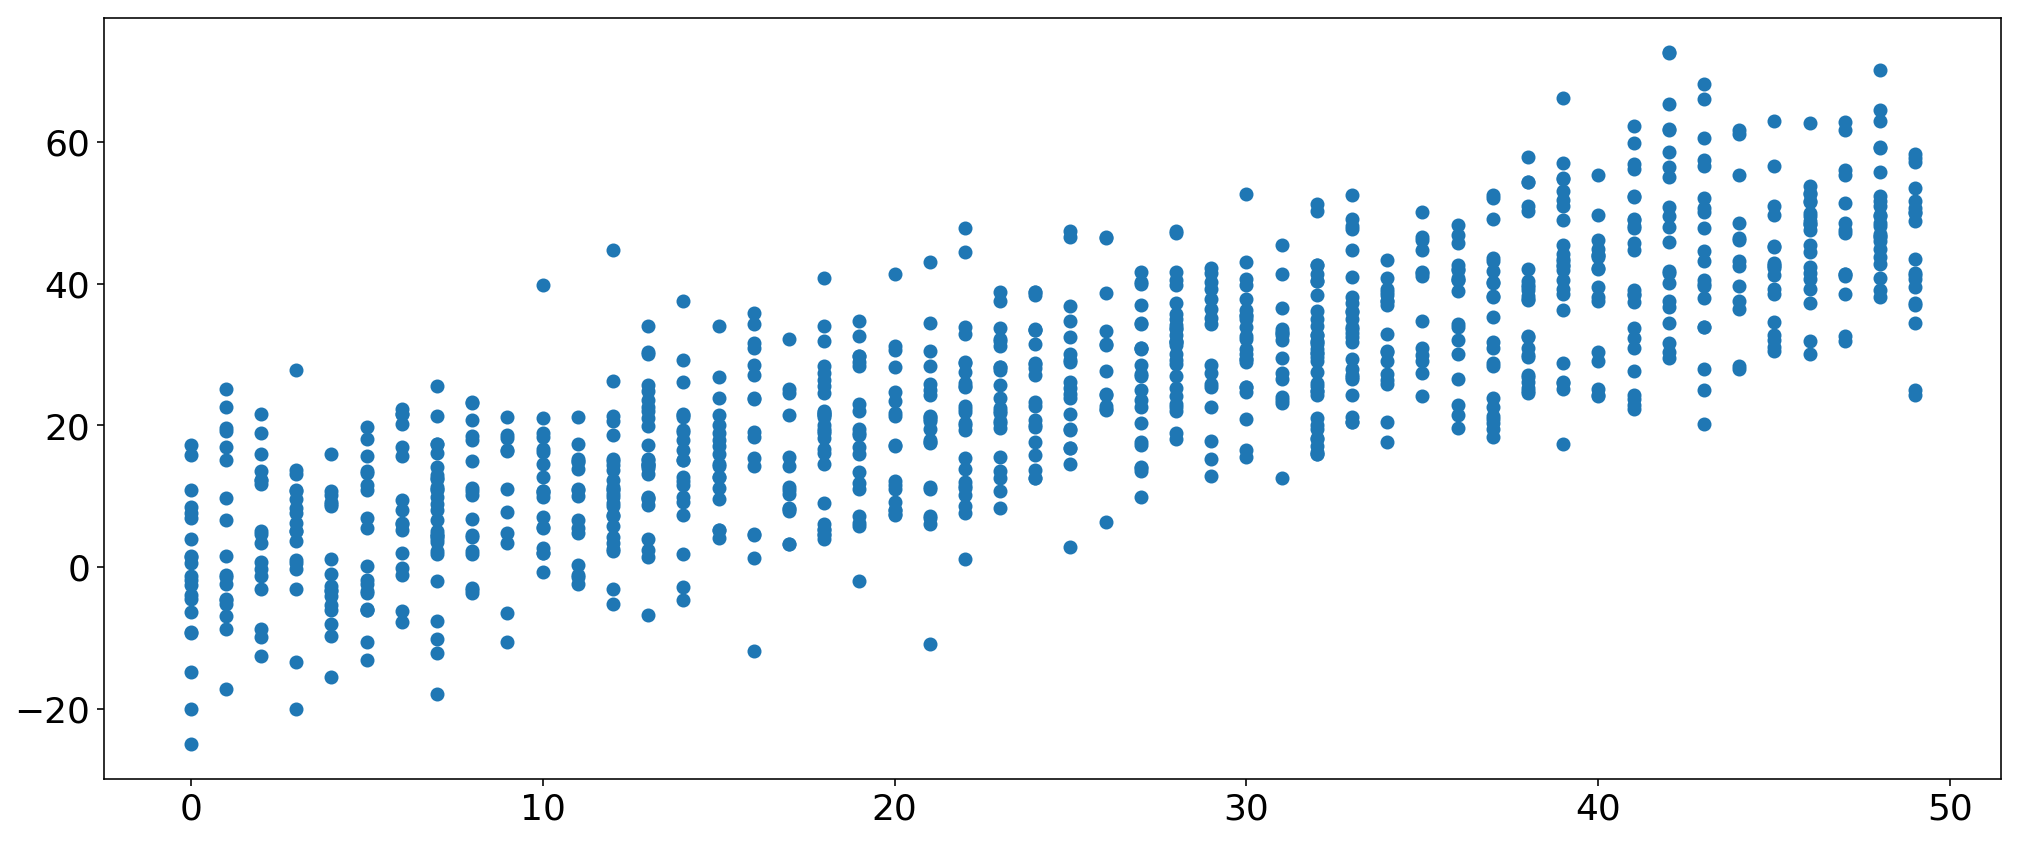

In [4]:
plt.scatter(x, y);

# Negative Correlation 
- $r$ < 0
- as $r$ approaches -1, x and y are highly negatively correlated 

In [5]:
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.94957116],
       [-0.94957116,  1.        ]])

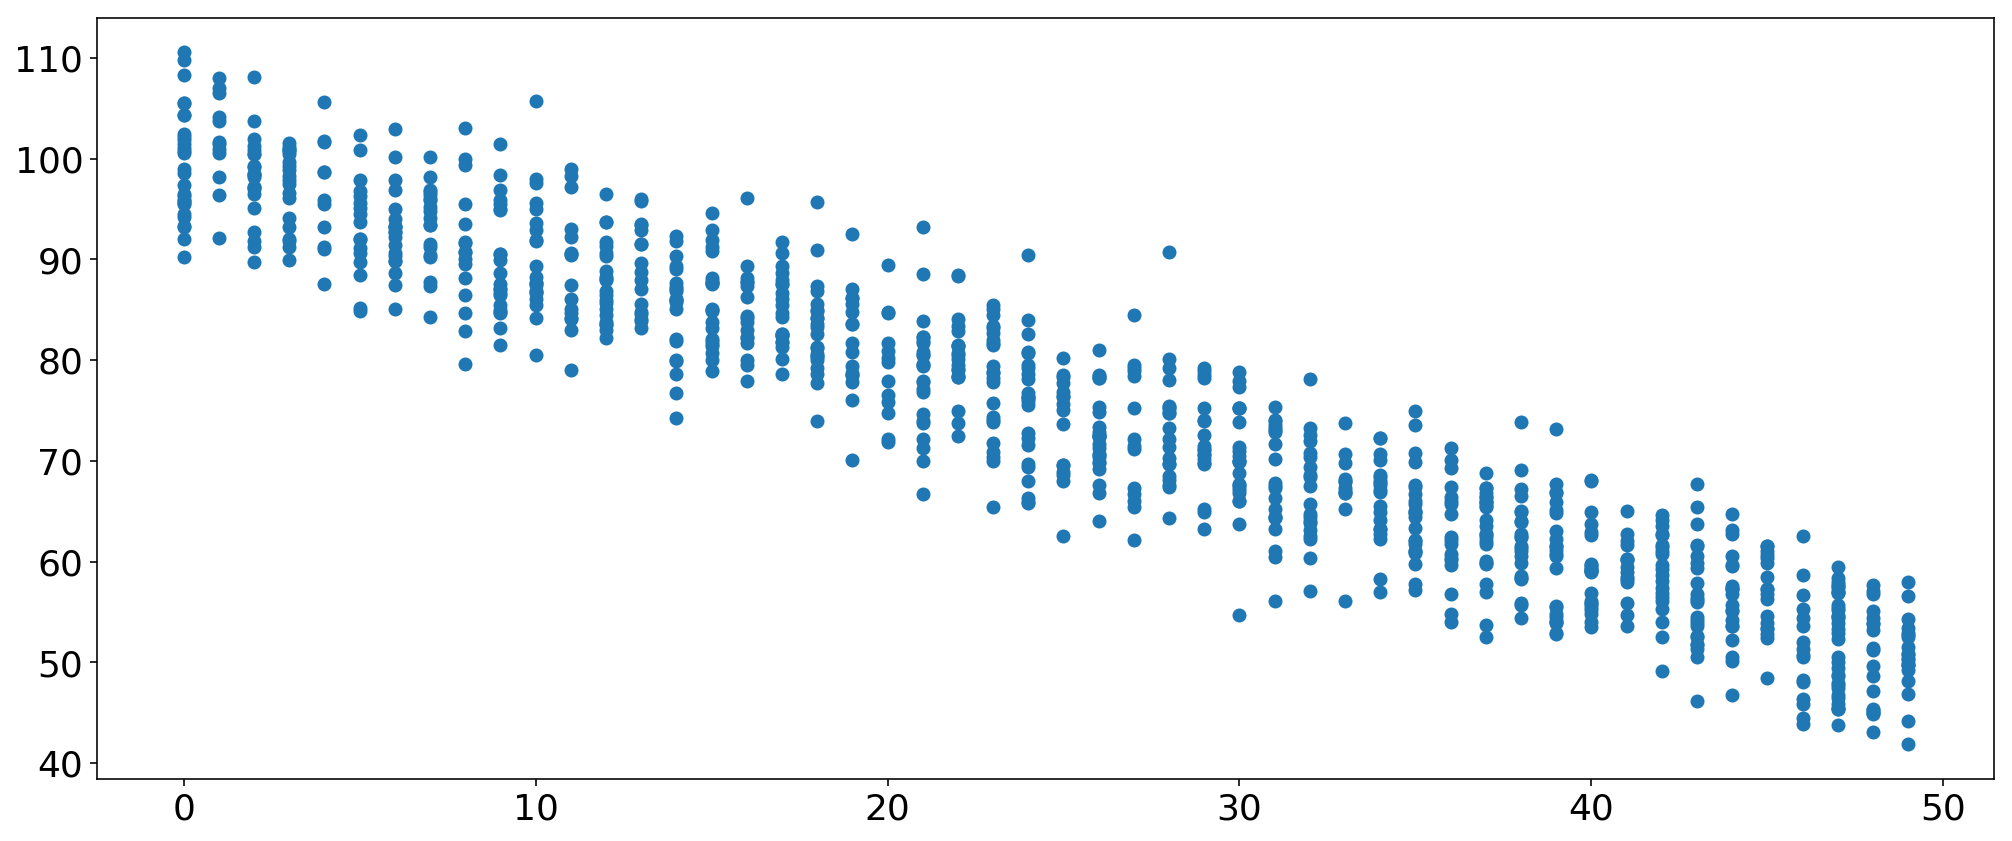

In [6]:
plt.scatter(x, y);

# No Correlation 
- $r \approx 0$
- as $r$ approaches 0, x and y are not correlated 

In [7]:
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.00554681],
       [-0.00554681,  1.        ]])

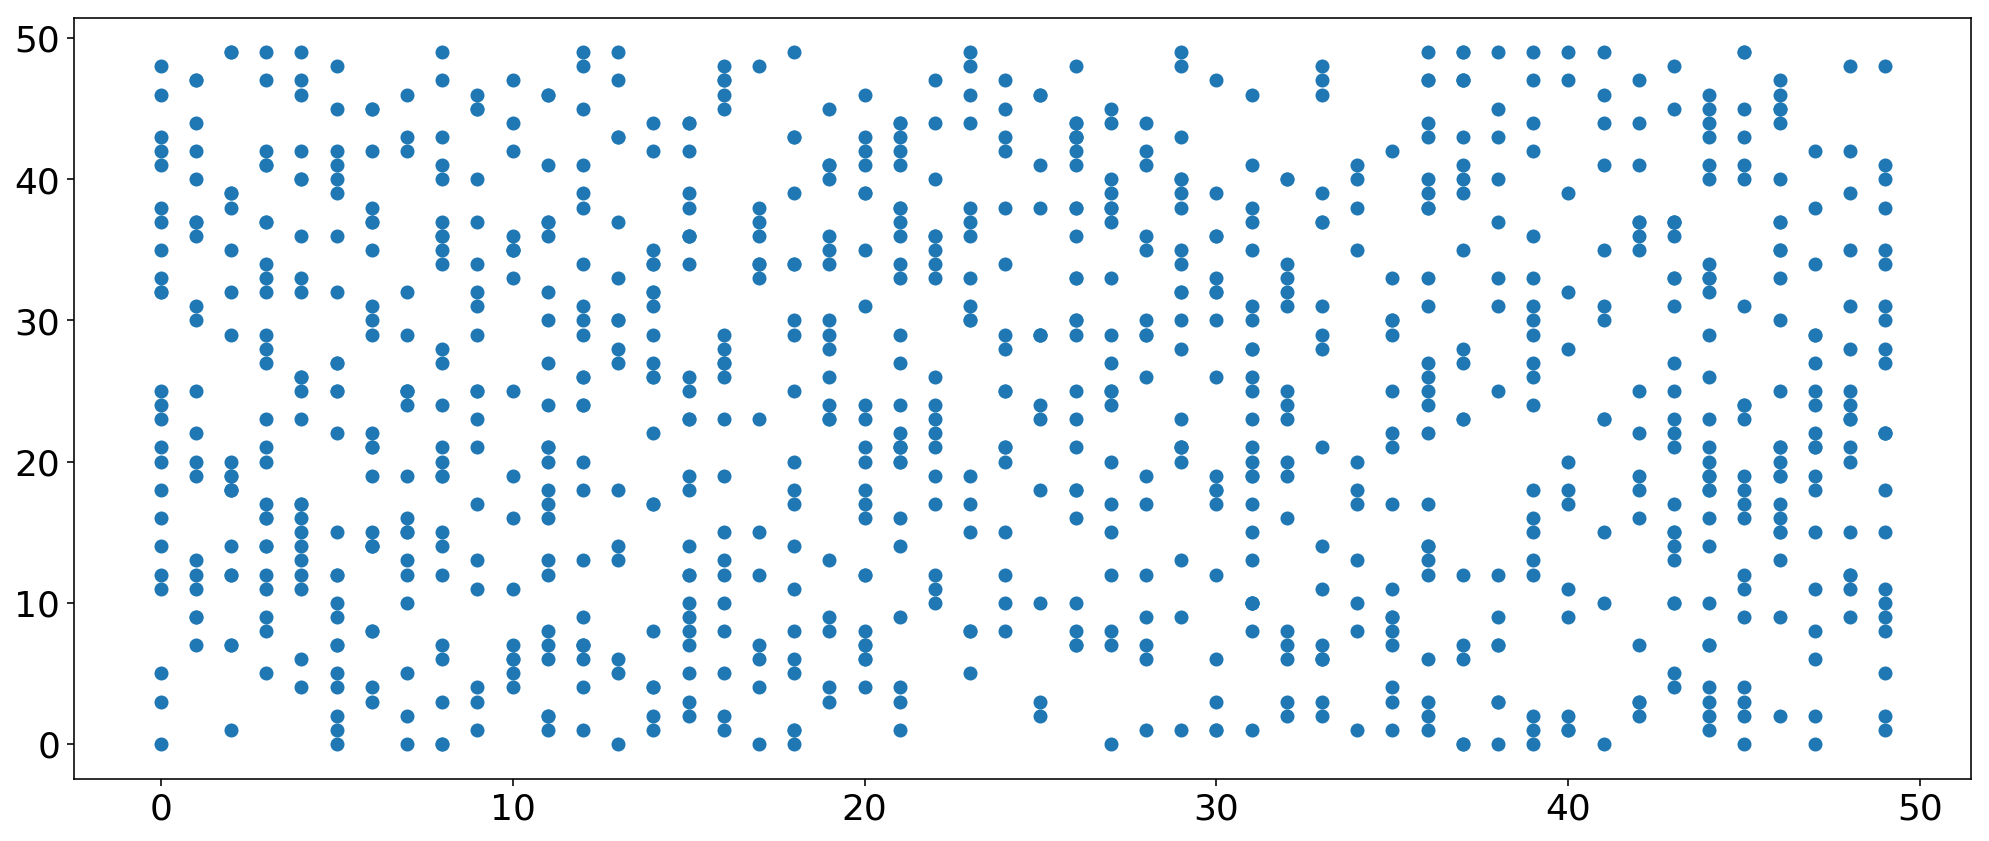

In [8]:
plt.scatter(x, y);

## Clicker Question 

What would you expect Pearson's correlation for the following relationship to be?

In [9]:
np.random.seed(888)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 200)
  
# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 200)

np.corrcoef(x, y)

array([[1.        , 0.83334929],
       [0.83334929, 1.        ]])

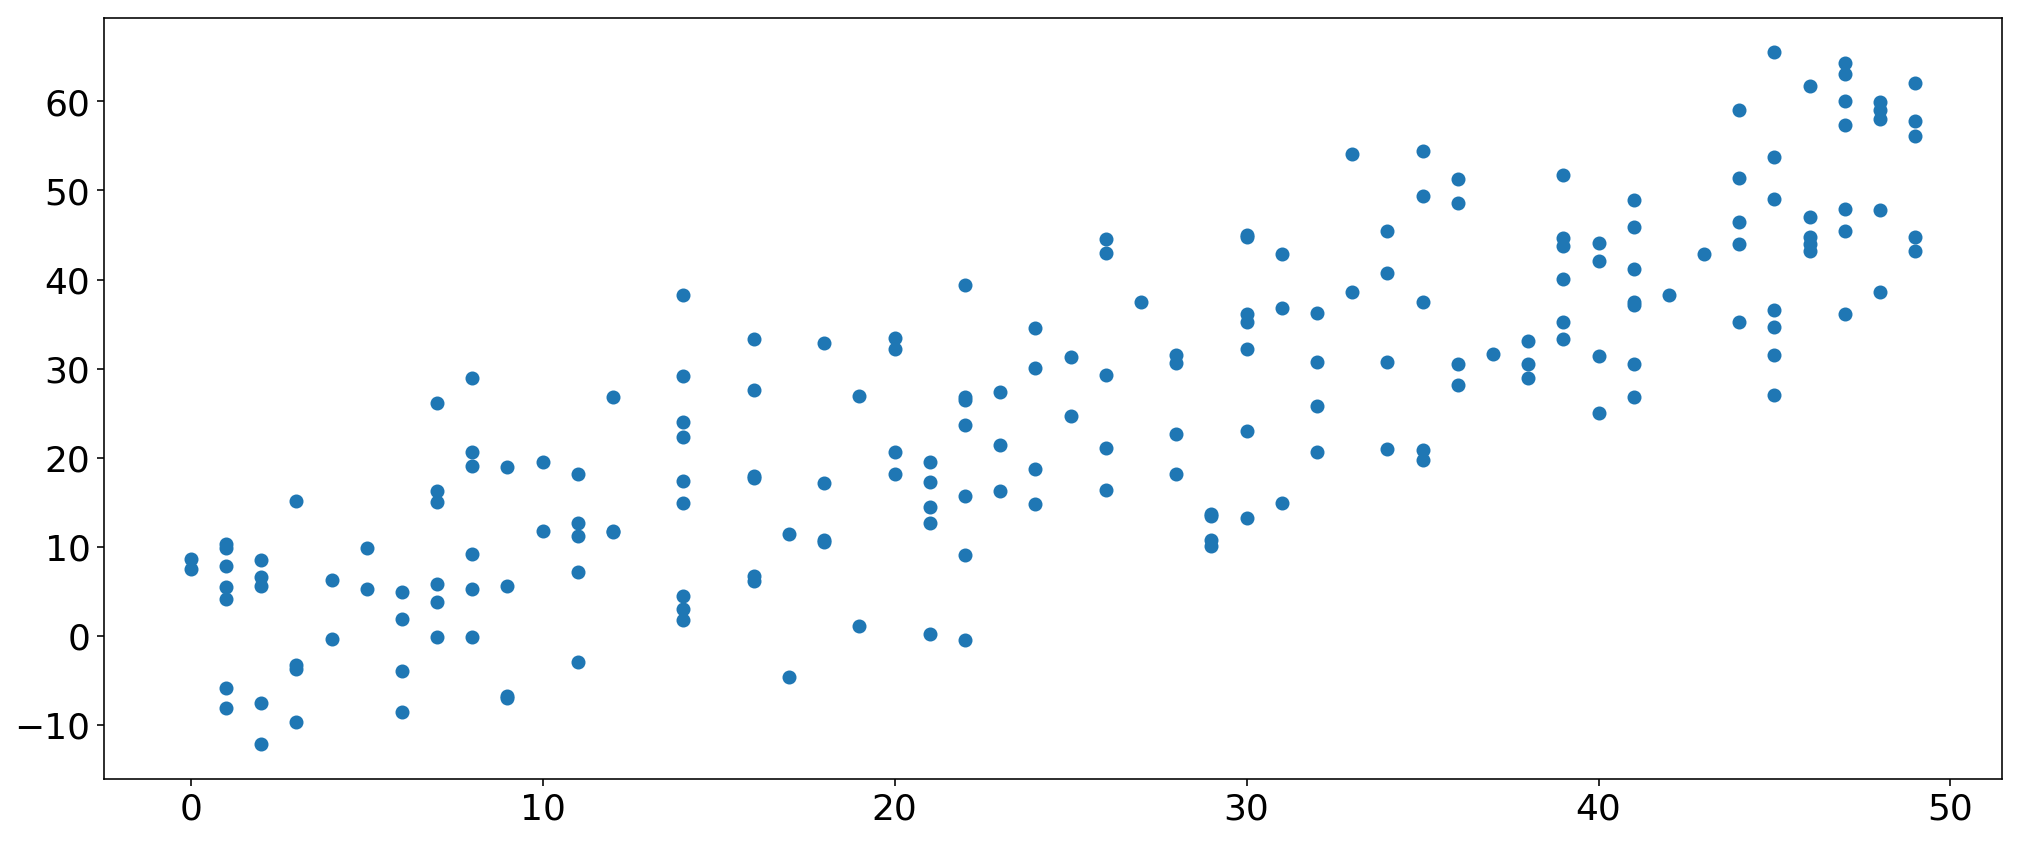

In [10]:
plt.scatter(x, y);

- A) -0.8
- B) -0.4
- C) 0
- D) 0.4
- E) 0.8

# Regression Reminder

$$outcome = \beta_0 + \beta_1*predictor$$

$\beta_1 \approx r $ if ...

- $predictor$ and $outcome$ each have a standard deviation of 1.

In [11]:
# inputs are mean, sd, and number of observations
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

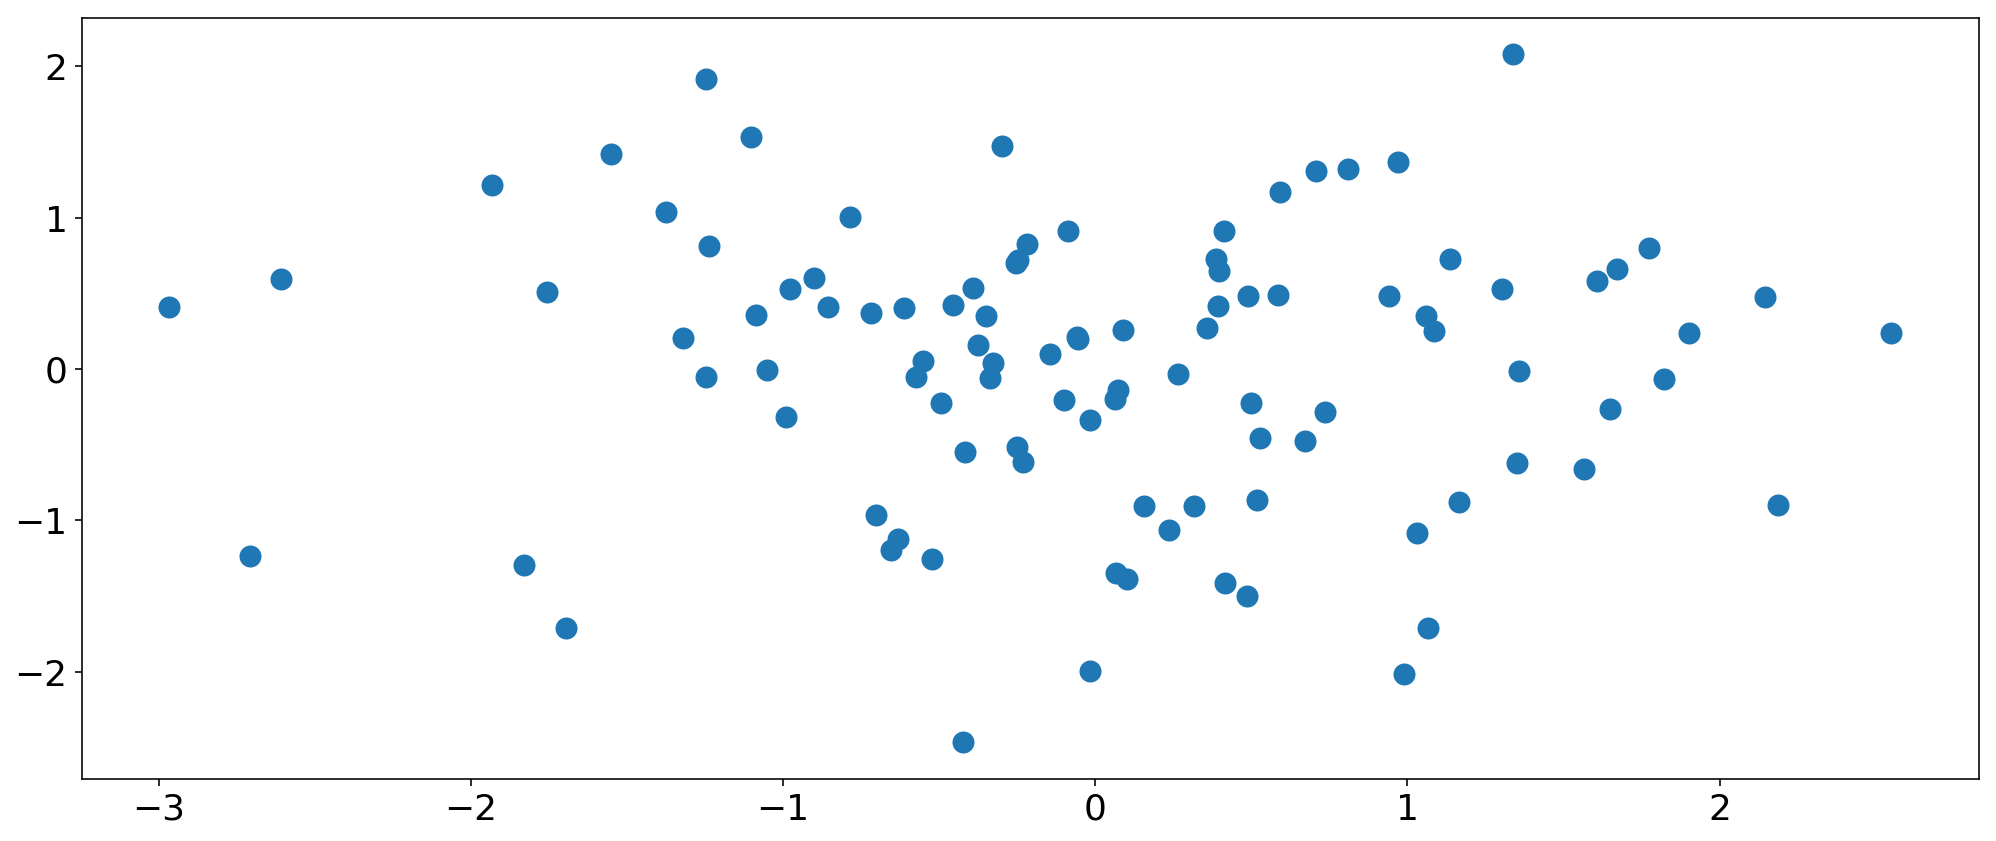

In [12]:
# look at the data
plt.scatter(x,y, s=100);

In [13]:
# regression as we've done previously
outcome, predictors = patsy.dmatrices('y ~ x')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1281
Date:                Wed, 01 May 2019   Prob (F-statistic):              0.721
Time:                        13:29:37   Log-Likelihood:                -131.74
No. Observations:                 100   AIC:                             267.5
Df Residuals:                      98   BIC:                             272.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0135      0.091      0.148      0.8

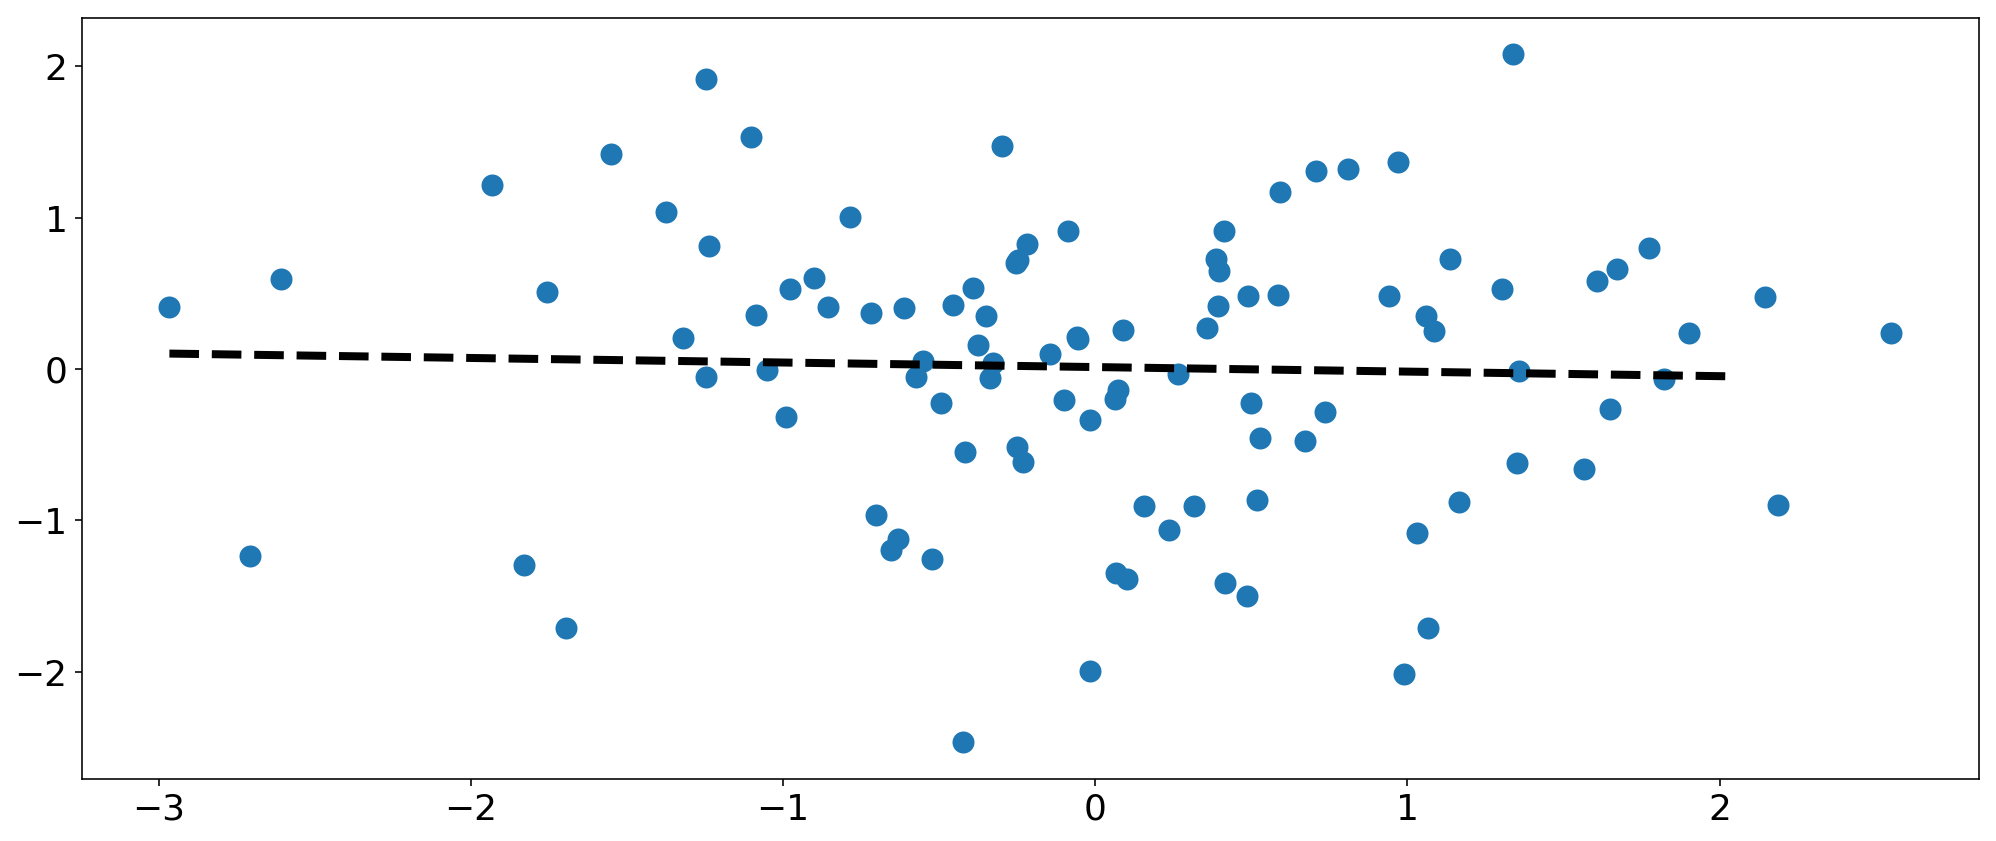

In [14]:
## plot model for data
plt.scatter(x,y, s=100)

# Generate and plot the model fit line
xs = np.arange(x.min(), x.max())
ys = res.params[1] * xs + res.params[0]
plt.plot(xs, ys, '--k', linewidth=4, label='Model');

In [15]:
print('model beta: ' , res.params[1])
print('corr: ', pearsonr(x,y)[0])

model beta:  -0.030056695882126217
corr:  -0.0361300120183639


## The Data

Returning to the regression question we looked at last class:

In [16]:
# read in file; specify that it is tab-separated file
df = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/index.txt', sep="\t")
df = df[df['ViolCrime'] < 50]
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


## Clicker Question

What is most correlated with Viol Crime?

- A) PovPct
- B) Brth15to17
- C) Brth18to19
- D) TeenBrth

In [17]:
df.corr()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
PovPct,1.000000,0.698813,0.626986,0.515648,0.673180
Brth15to17,0.698813,1.000000,0.955235,0.743993,0.980834
Brth18to19,0.626986,0.955235,1.000000,0.700290,0.992755
ViolCrime,0.515648,0.743993,0.700290,1.000000,0.714076
TeenBrth,0.673180,0.980834,0.992755,0.714076,1.000000


Note that each variable is perfectly correlated with itself (b/c you're comparing the exact same values!)

`TeenBrth` is highly correlated with `Brth15to17` and `Brth18to19`....which makes sense as the latter are subsets of the former. 

Last lecture we saw that `PovPct` plays a role in `TeenBrth`, so it makes sense that these values are somewhat correlated.

In [18]:
# run model
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     39.78
Date:                Wed, 01 May 2019   Prob (F-statistic):           8.50e-08
Time:                        13:29:37   Log-Likelihood:                -178.86
No. Observations:                  50   AIC:                             361.7
Df Residuals:                      48   BIC:                             365.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7423      4.151      4.034      0.0

#### linear regression
$\beta_1 = 1.93$  

#### correlation
$r = 0.67$  
$R^2 =  0.45$

$R-squared$ ($R^2$) is equal to Pearson's correlation ($r$) squared.

**$R-squared$** is the percentage of the the $outcome$ variable variation that is explained by a linear model. It takes a value between 0 and 100%.

Here, 45.3% of the variation in Teen Birth ($outcome$) is explained by Poverty Percentage ($predictor$)

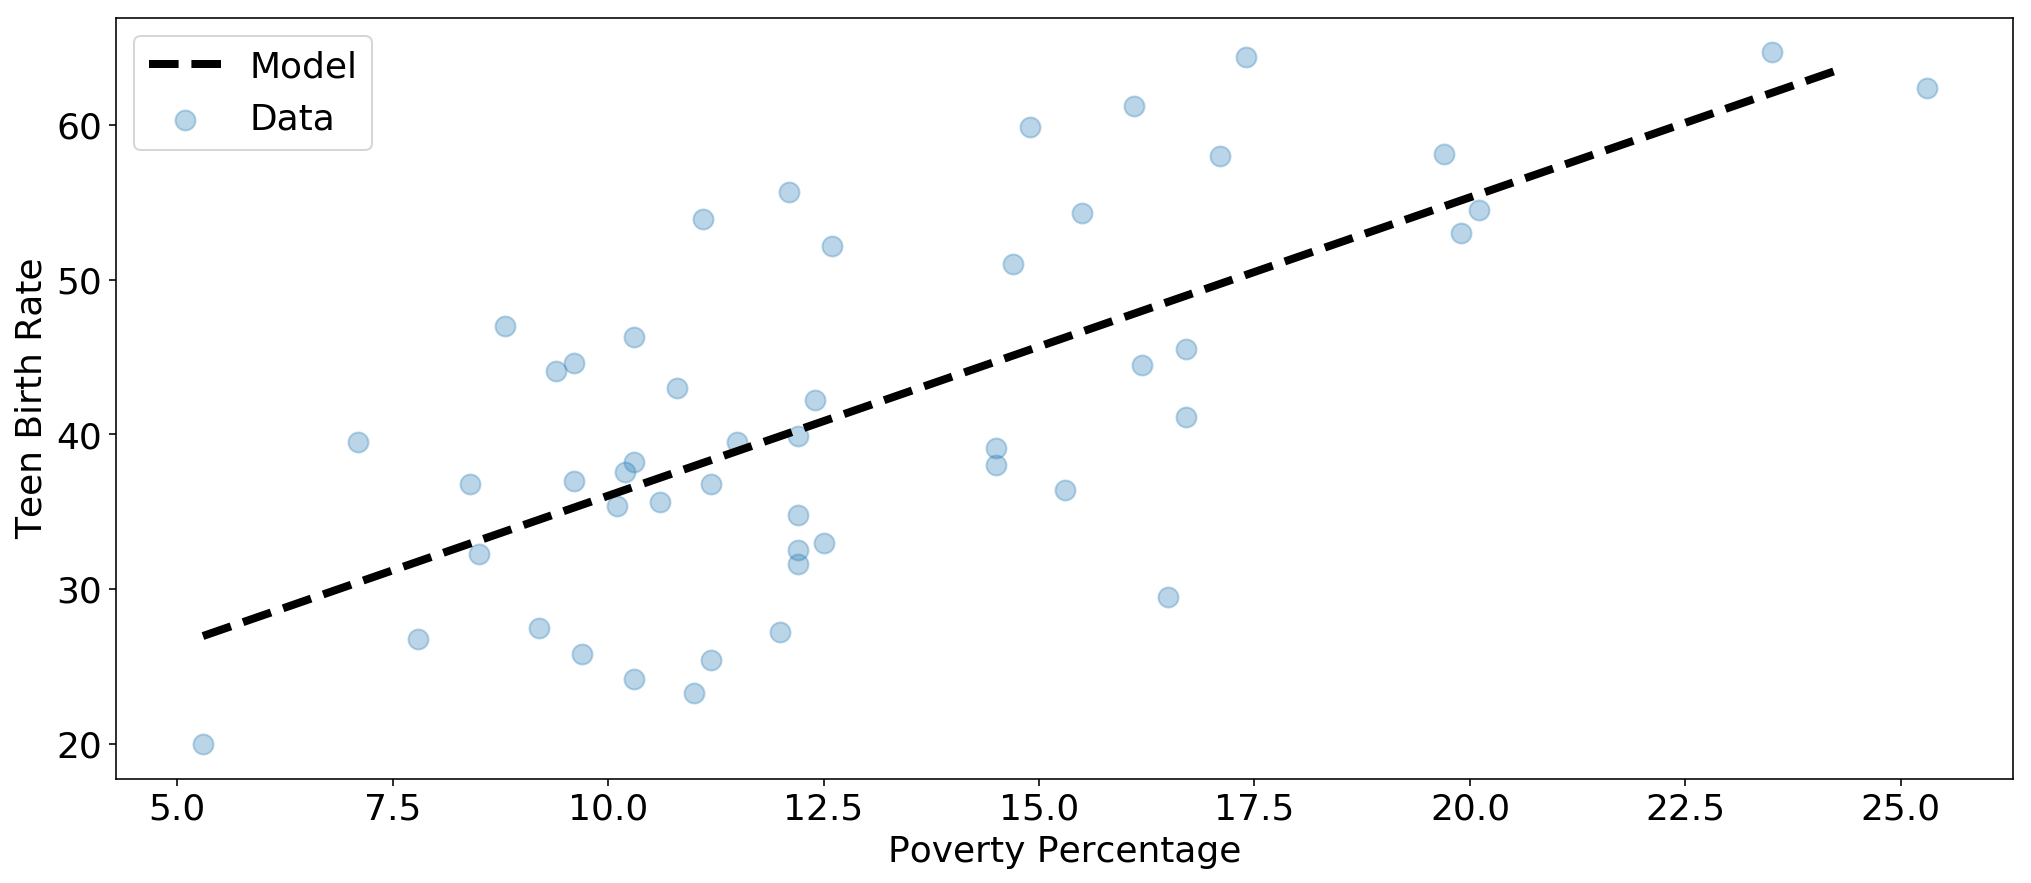

In [19]:
## Plot the model fit line

# Plot the orginal data (as before)
plt.scatter(df['PovPct'], df['TeenBrth'], alpha=0.3, label='Data', s=100);

# Generate and plot the model fit line
xs = np.arange(df['PovPct'].min(), df['PovPct'].max())
ys = 1.9292 * xs + 16.7423
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate')
plt.legend();

## Returning to multiple linear regression

- Visualizing the relationship
- Correlation coefficients


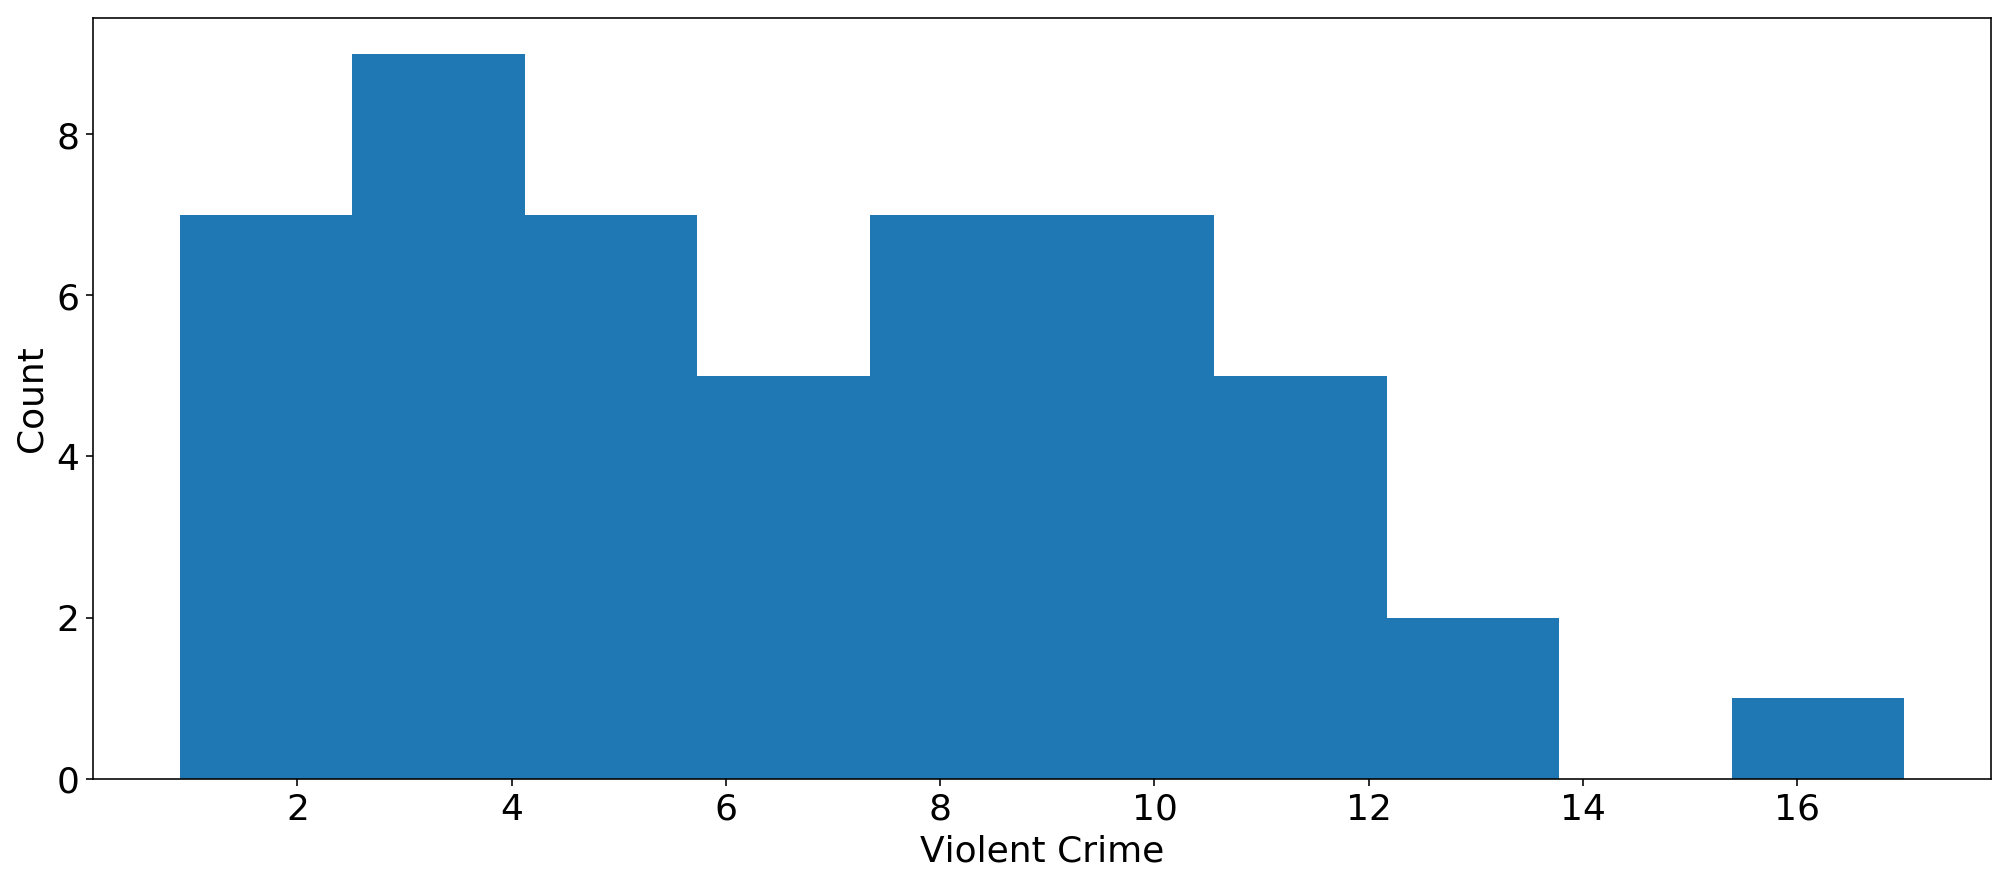

In [20]:
plt.hist(df['ViolCrime']) 
plt.xlabel('Violent Crime')
plt.ylabel('Count');

Chat with your neighbor.

What is your interpretaion of these data?

Should this variable be used as is in our regression model? 
- If yes, why is that your conclusion?
- If no, why not? What could we do to use this variable?


## Clicker Question

Should this variable be used in our regression model as is? 
- A) Yes 
- B) No
- C) I don't know

In [21]:
# add a new column 'Violent'
df['Violent'] = df['ViolCrime'].apply(lambda x: 0 if x < 6.7 else 1)
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth,Violent
0,Alabama,20.1,31.5,88.7,11.2,54.5,1
1,Alaska,7.1,18.9,73.7,9.1,39.5,1
2,Arizona,16.1,35.0,102.5,10.4,61.2,1
3,Arkansas,14.9,31.6,101.7,10.4,59.9,1
4,California,16.7,22.6,69.1,11.2,41.1,1


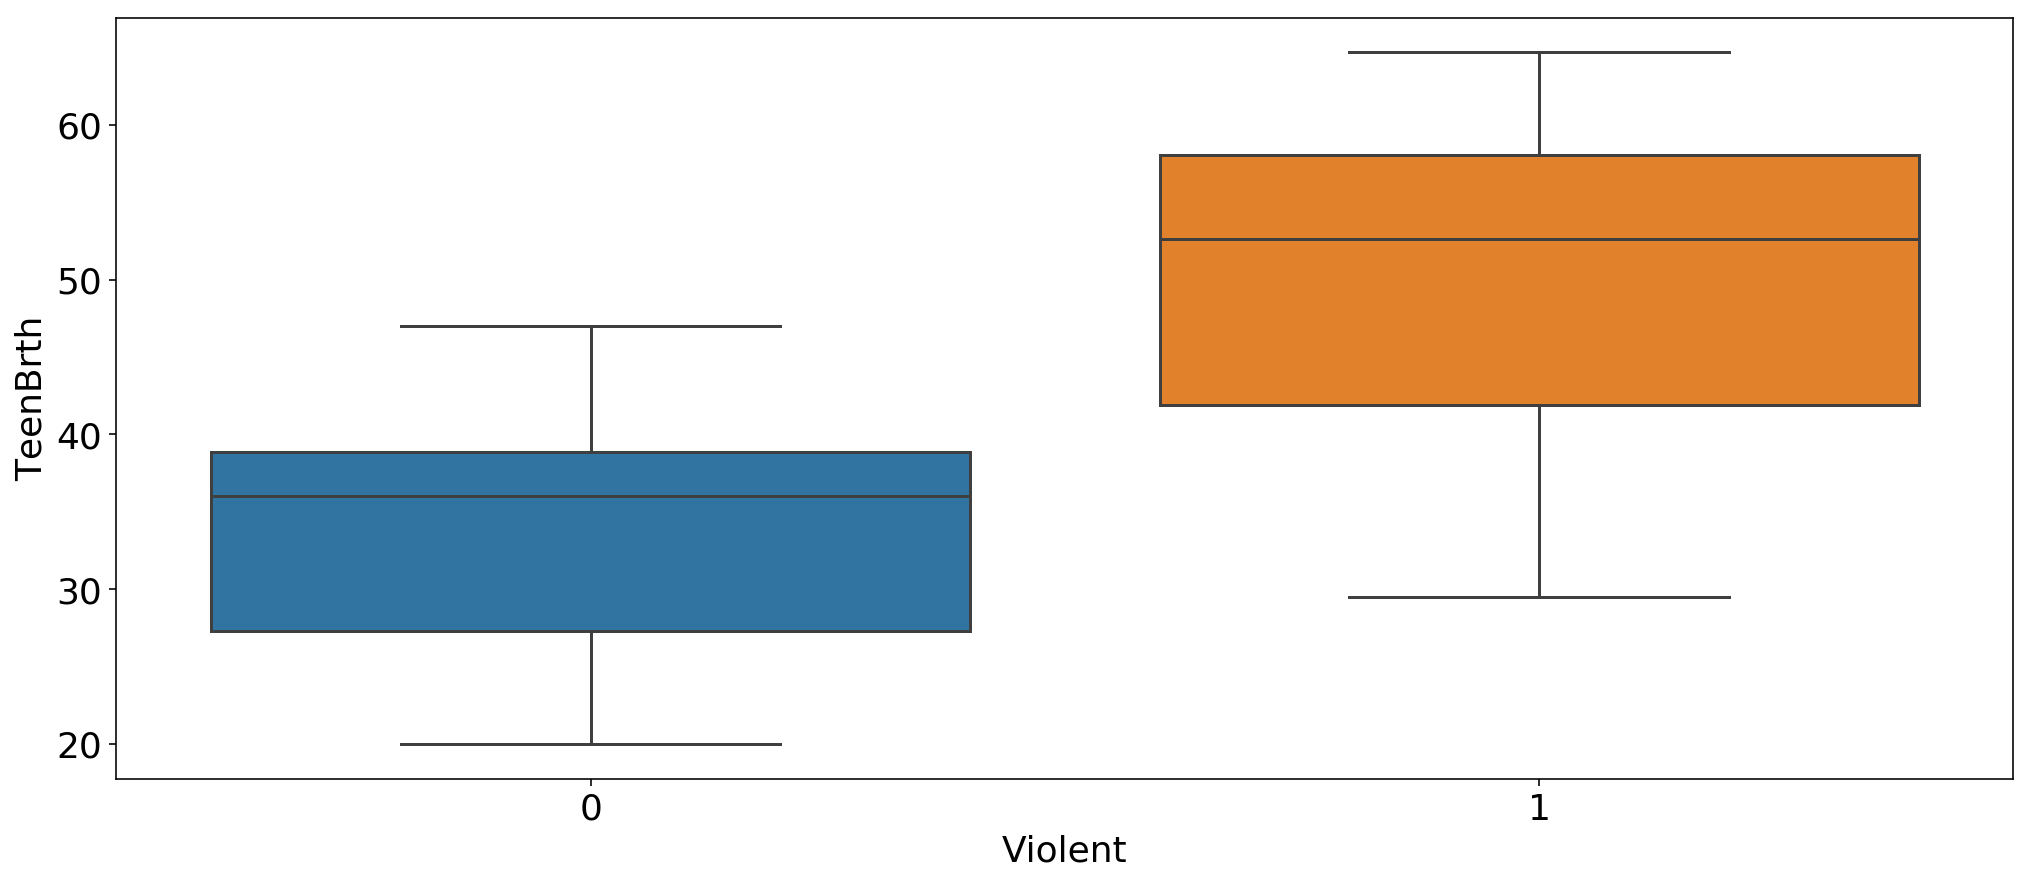

In [22]:
sns.boxplot(x='Violent', y='TeenBrth', data=df);

In [23]:
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct + Violent ', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     36.03
Date:                Wed, 01 May 2019   Prob (F-statistic):           3.26e-10
Time:                        13:29:39   Log-Likelihood:                -170.71
No. Observations:                  50   AIC:                             347.4
Df Residuals:                      47   BIC:                             353.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.8110      3.636      5.448      0.0

You may have noted above that there is an $R-squared$ and an $Adj R-squared$ in the model output.

Every time a predictor is added to a model, $R-Squared$ will increase, making you *think* you should add all the predictors.

$Adj R-Squared$ is adjusted to account for the number of predictors in a model (applies in multiple regression), allowing multiple models to be compared more accurately. 

#### One predictor (Poverty Percentage)
$R^2 = 0.45$  
$Adj R^2 = 0.44$



#### Two predictors (Violent and Poverty Percentage)
$R^2 = 0.61$  
$Adj R^2 = 0.59$

Comparison of the adjusted correlation coefficients suggests that even after adjusting for the fact that we're adding a second predictor, the second model explains more of the variance in the outcome variable, Teen Birth Rate.

## Clicker Question

How are you doing? 

- A) totally got it
- B) kinda got it
- C) neutral
- D) kinda confused
- E) super confused

## Visualizing multiple regression models

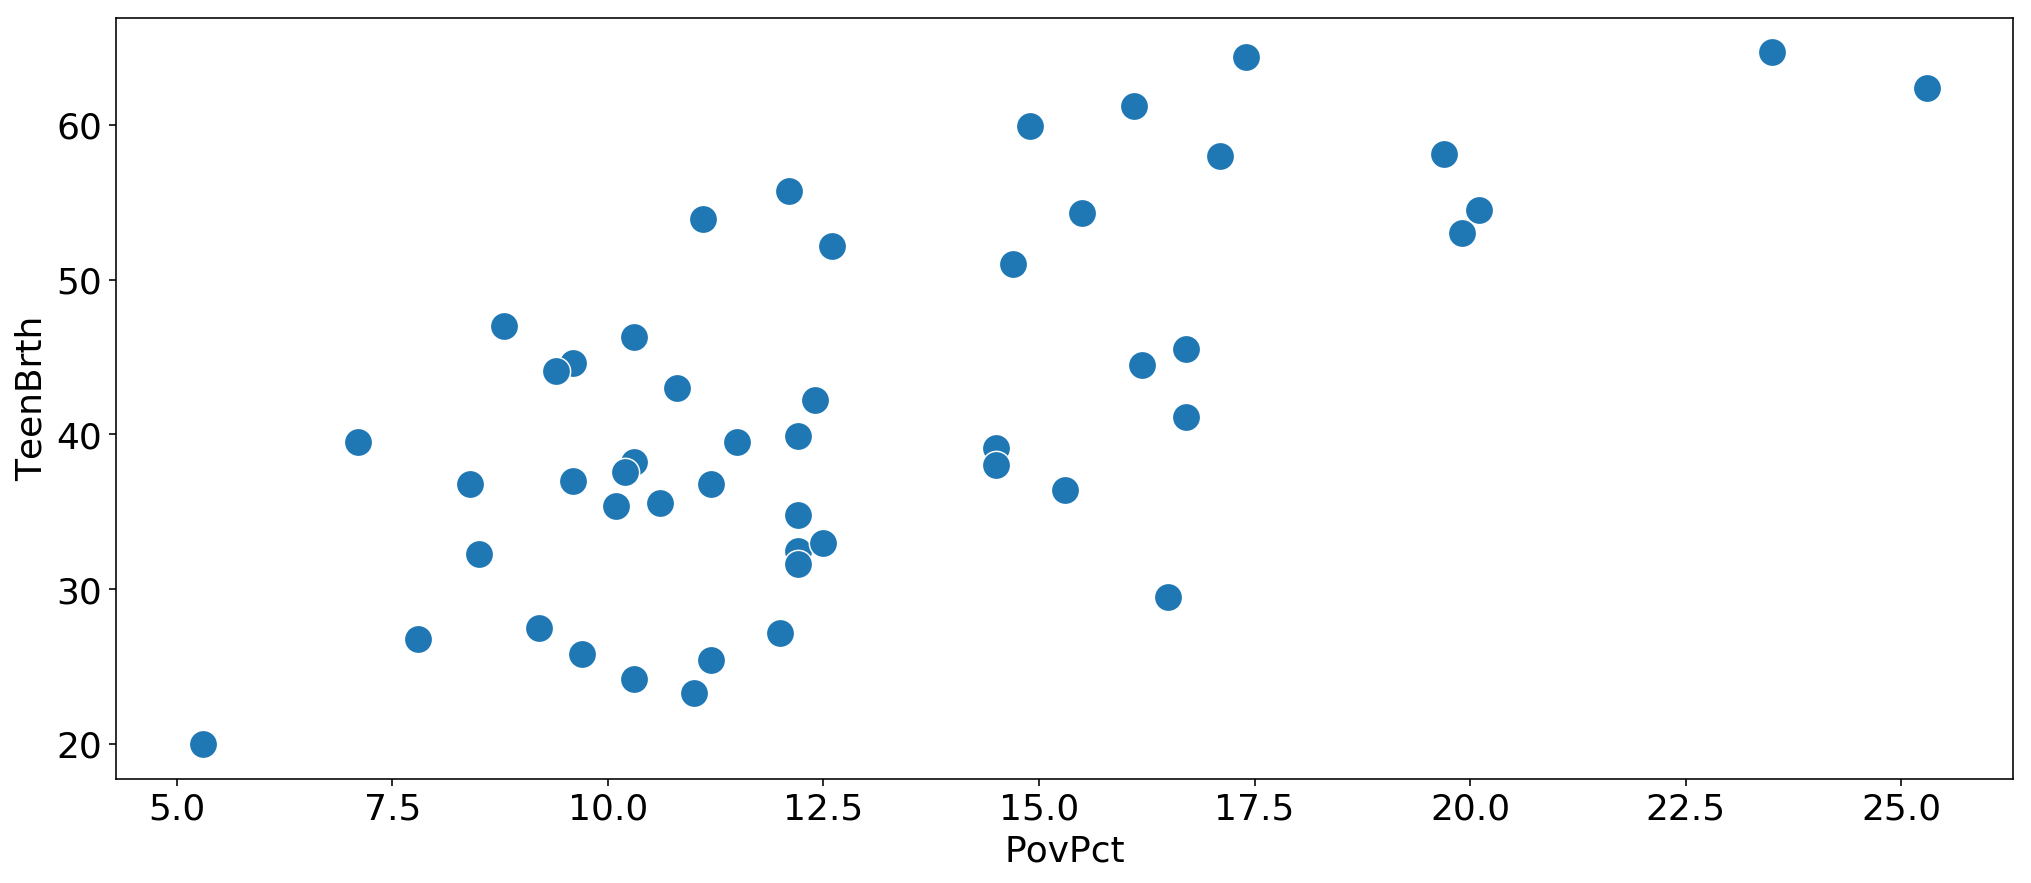

In [24]:
# relationship between originalpredictor and outcome;
sns.scatterplot(x='PovPct', y='TeenBrth', 
                data=df, s=200);

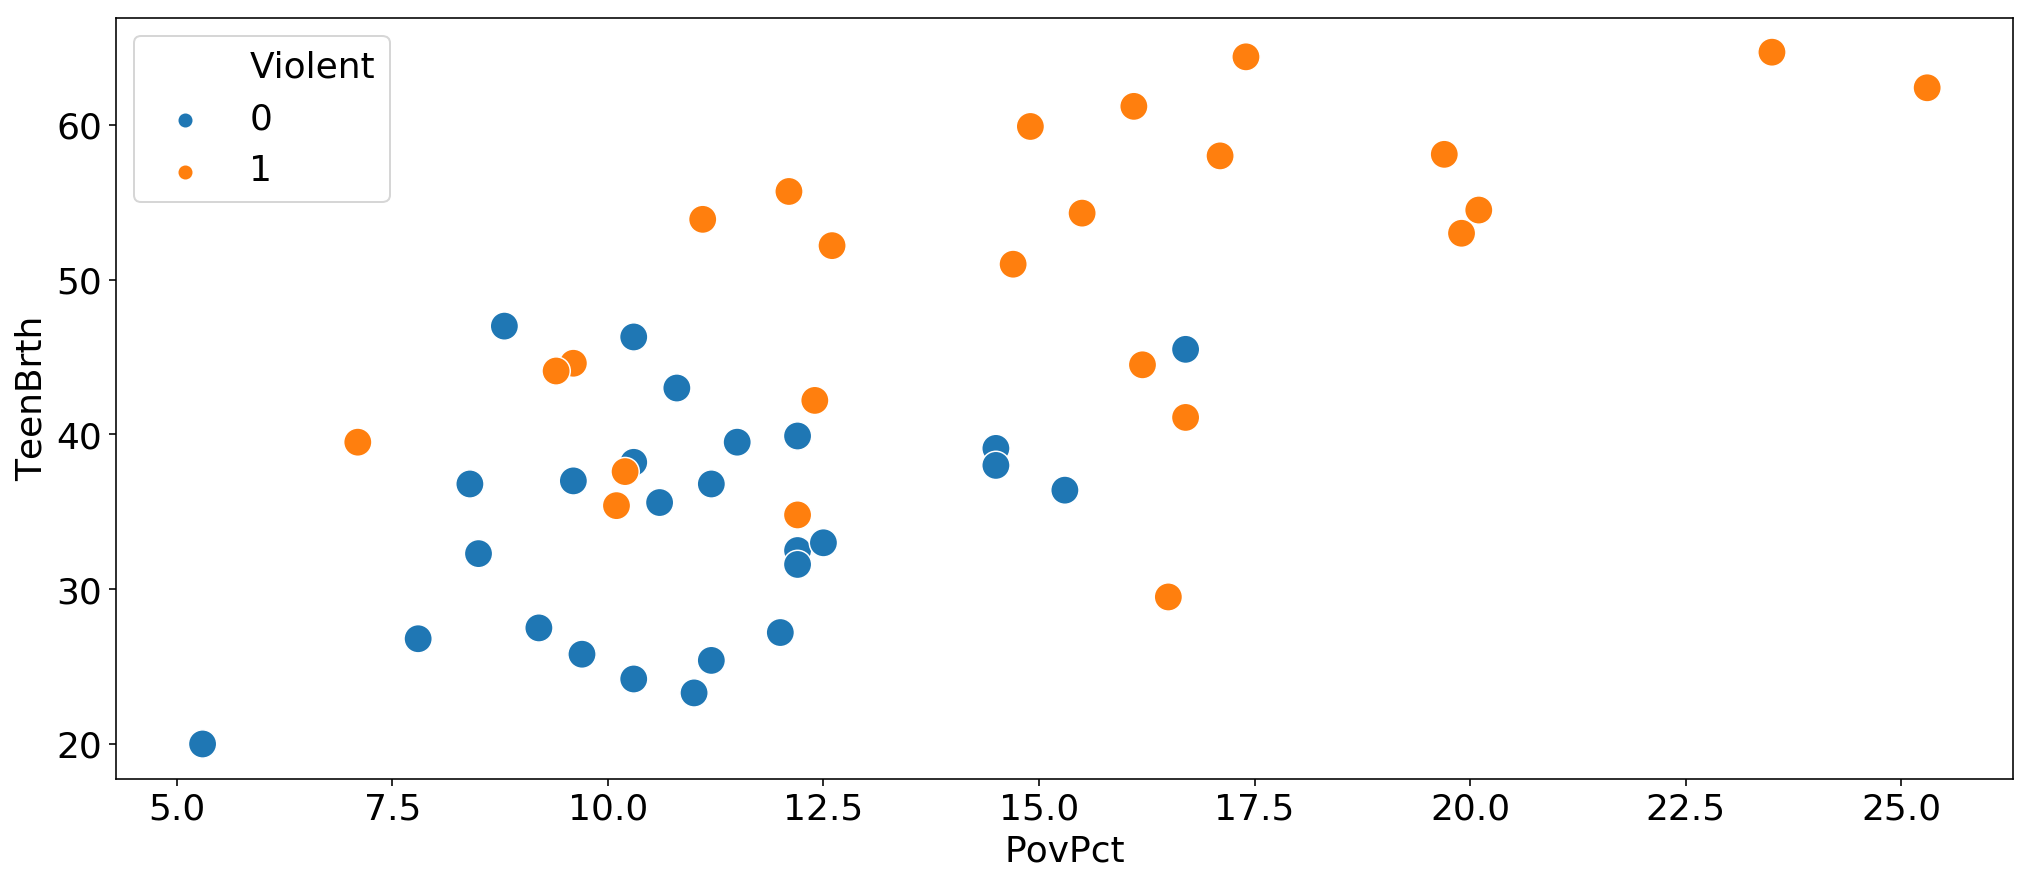

In [25]:
# color by Violent
sns.scatterplot(x='PovPct', y='TeenBrth', hue='Violent', 
                data=df, s=200);

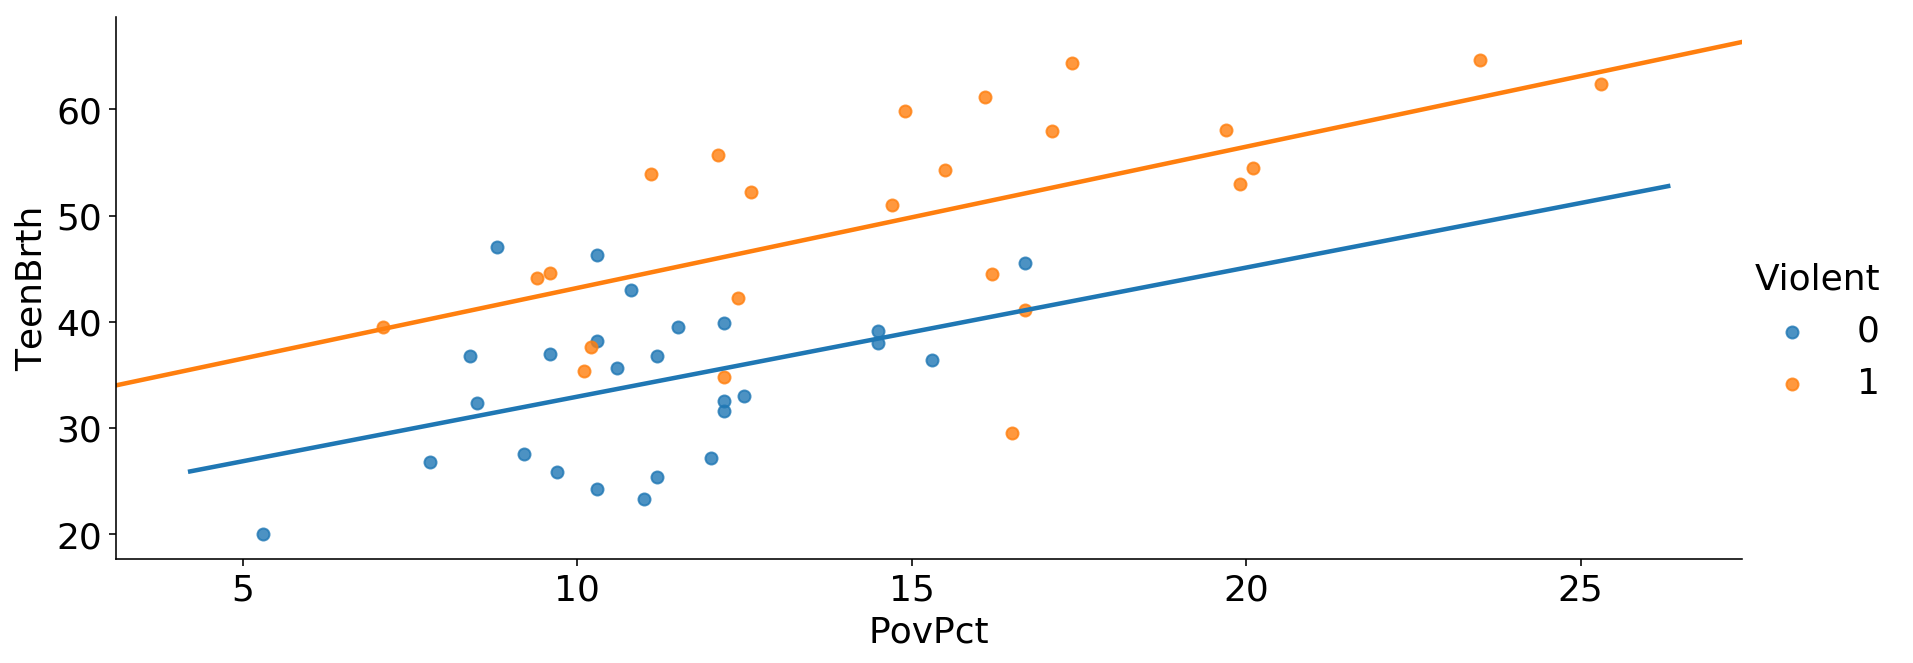

In [26]:
# plot with regression line
sns.lmplot(x="PovPct", y="TeenBrth", hue="Violent", 
           data=df, ci=None, aspect=2.5 );

$$ Teen Birth = 19.8 + (1.30  * Poverty Percentage) + (10.5 * Violent) $$

## Clicker Question

How are you doing? 

- A) totally got it
- B) kinda got it
- C) neutral
- D) kinda confused
- E) super confused

## Cautions about correlation

- Anscombe's Quartet: A Cautionary Tale
- Correlation != Causation

Code in this example taken from [here](https://matplotlib.org/gallery/specialty_plots/anscombe.html).

In [27]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


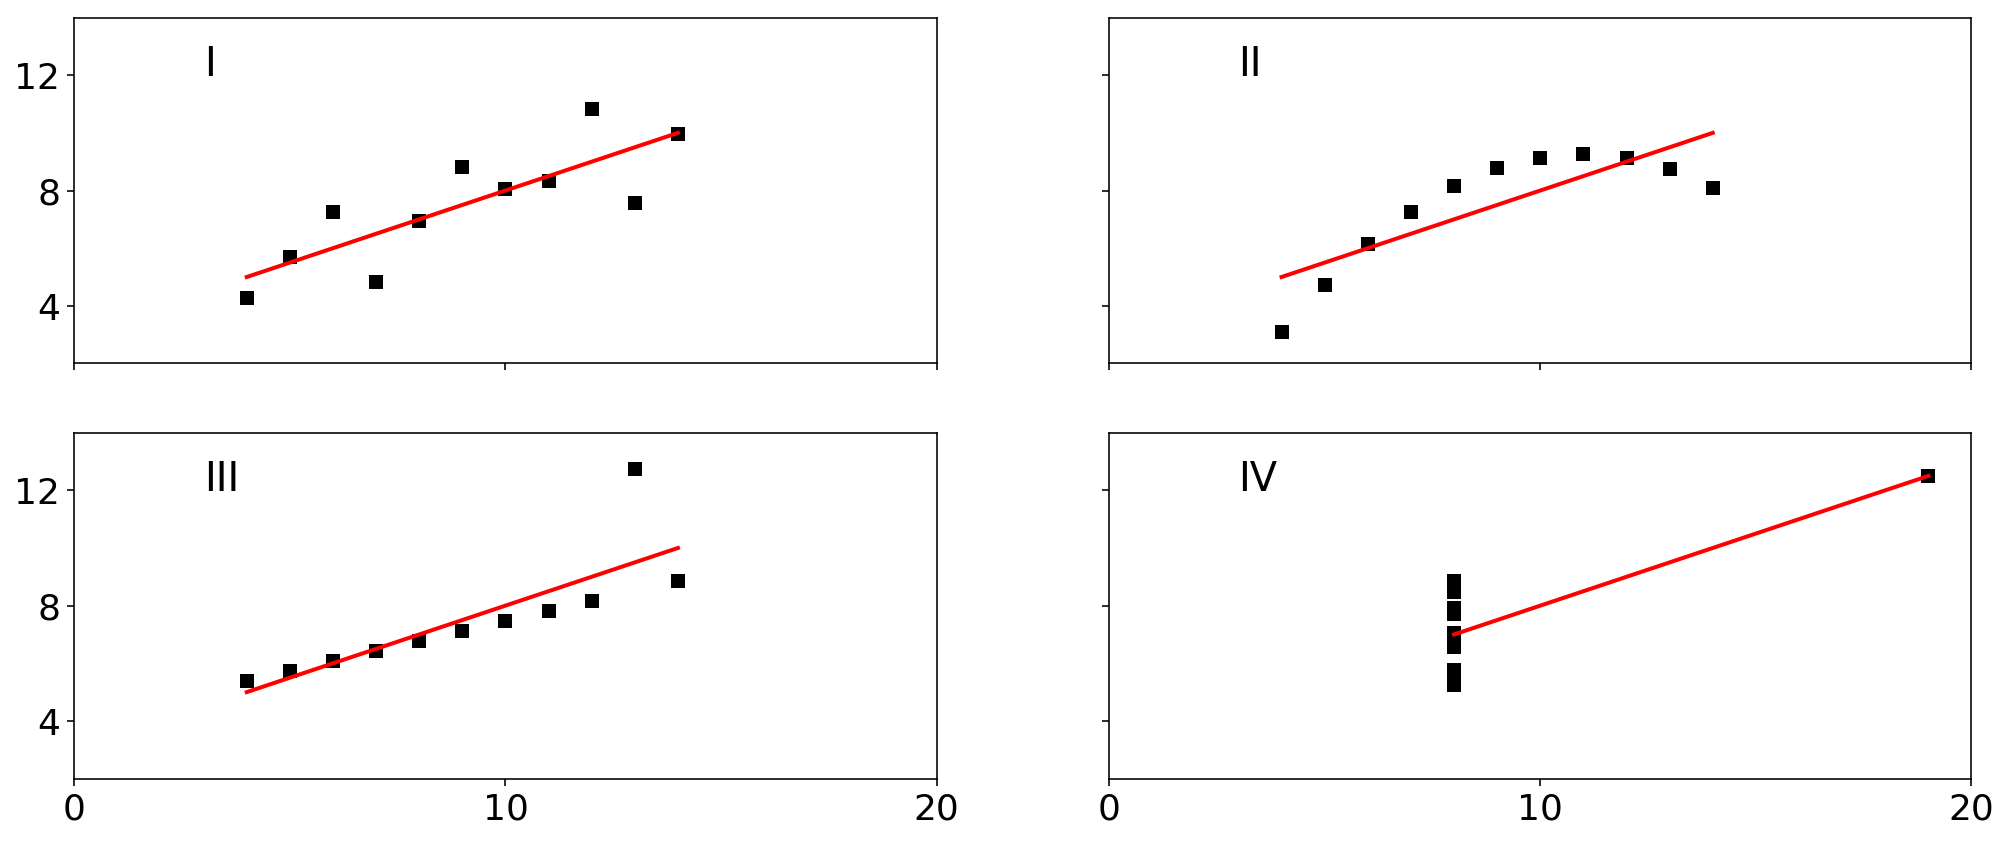

In [28]:
def fit(x):
    return 3 + 0.5 * x

xfit = np.array([np.min(x), np.max(x)])

plt.subplot(221)
plt.plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticks=(0, 10, 20), xticklabels=[],
         yticks=(4, 8, 12), yticklabels=[], )
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)
xfit = np.array([np.min(x4), np.max(x4)])
plt.plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

plt.show()

## Correlation != Causation

Measures a relationship, but neither correlation nor linear regression can say one variable _causes_ the other.

![](img/maine_margarine.png)

Source: http://www.tylervigen.com/spurious-correlations 

![](img/pool_cage.png)

Source: http://www.tylervigen.com/spurious-correlations 


# Difference in means: t-test

The t-test tests for a difference in means between groups.

Student's t-test assumptions:

- Data are continuous
- Normally distributed
- Large enough sample size
- Equal variance b/w groups


$H_0: \bar x = \bar y$

$H_a: \bar x \ne \bar y$

In [29]:
df.groupby(['Violent'])['TeenBrth'].mean()

Violent
0    34.180769
1    49.858333
Name: TeenBrth, dtype: float64

$H_0: \bar x_{ViolentTeenBirthRate} = \bar y_{NotViolentTeenBirthRate}$

$H_a: \bar x_{ViolentTeenBirthRate} \ne \bar y_{NotViolentTeenBirthRate}$

In [30]:
group1 = df.where(df.Violent==0).dropna()['TeenBrth']
group2 = df.where(df.Violent==1).dropna()['TeenBrth']

In [31]:
ttest_ind(group1, group2)

Ttest_indResult(statistic=-6.2376618103862, pvalue=1.0857382816884421e-07)

The p-value here is $1.08\times 10^{-7}$ ...which means that observing this difference in means due to random chance alone is very unlikely. 

We reject the null in favor of the alternative hypothesis, concluding that the means between the groups are not the same and that violence plays a role on Teen Birth Rate.

## Clicker Question

To understand the relationship between height and gender in this classroom, what would you use?

- A) linear regression
- B) correlation
- C) t-test
- D) something else